### Суть проєкту та датасет

Проєкт має допомогти зрозуміти роботу новою фічі Open AI: Code Interpreter. Всі ідеї для дослідження, код та візуалізація згенерований ChatGPT.

Датасет взятий звідси: https://www.kaggle.com/datasets/therealoise/top-1000-highest-grossing-movies-of-all-time.

`Movie Title`: The name of the movie.

`Year of Release`: The year the movie was released.

`Genre`: Categories where the movie belongs.

`Movie Rating`: Ratings given by IMDb registered users (on a scale of 1 to 10)

`Duration`: Movie running time in minutes.

`Gross`: Gross earnings in U.S. dollars.

`Worldwide LT Gross`: Worldwide Lifetime Gross (International + Domestic totals.

`Metascore`: Weighted average of many reviews coming from reputed critics (on a scale of 0 to 100)

`Votes`: Number of votes cast by IMDb registered users.

`Logline`: A one or two sentence summary of the film.

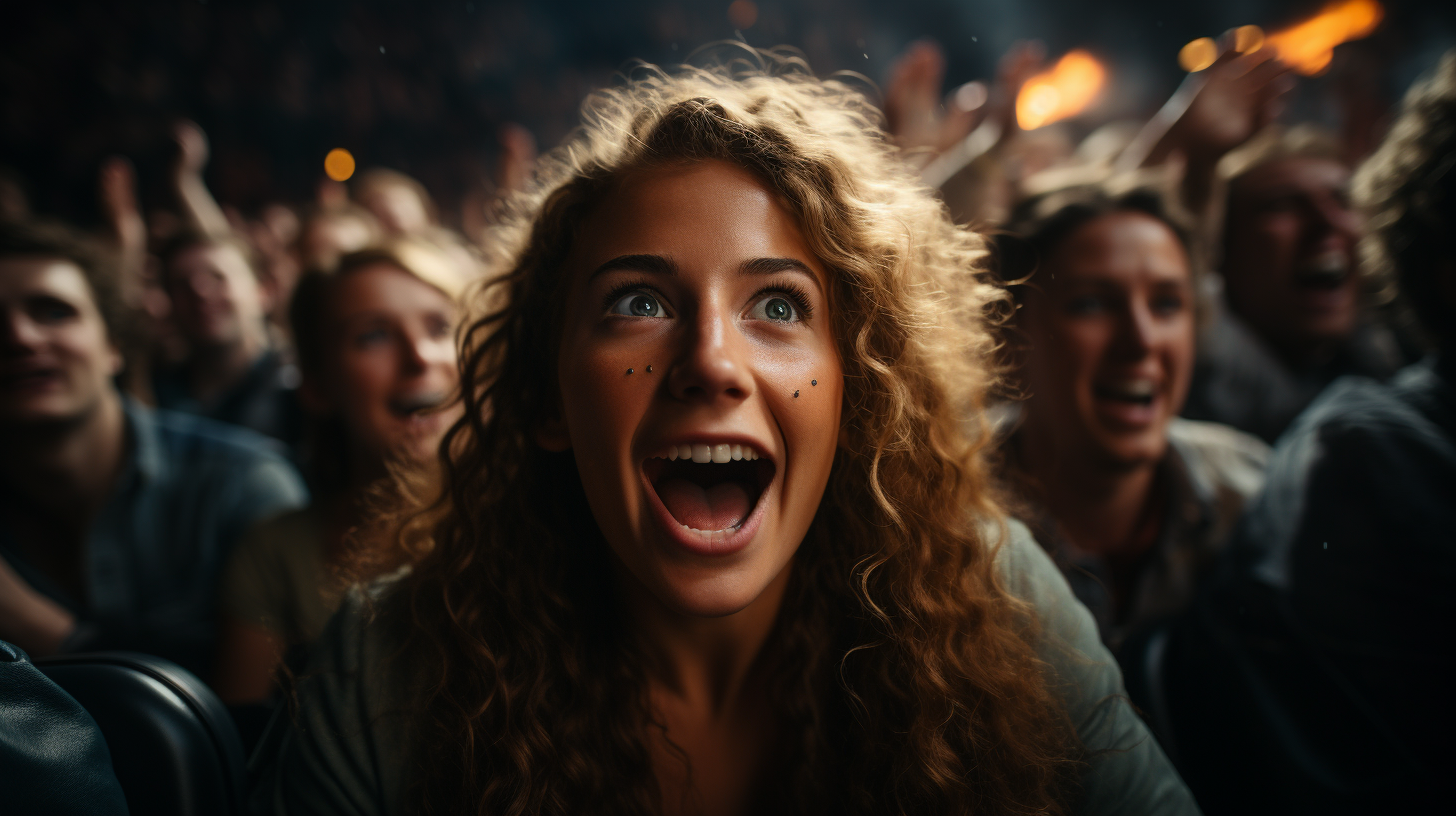

### Завантаження даних та ідеї для аналізу.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the csv file into a pandas DataFrame
movies_df = pd.read_csv('Top_1000_Highest_Grossing_Movies_Of_All_Time_.csv')

# Display the first 5 rows of the DataFrame
movies_df.head()

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...


Вісім ідей для аналізу:

1. Аналіз впливу жанру на прибутковість фільму: Можна дослідити, як жанр фільму впливає на його загальний гросс, а також на його рейтинг. Це може допомогти визначити, які жанри найбільш популярні та прибуткові.

2. Кореляція між рейтингом фільму та прибутковістю: Чи є зв'язок між тим, наскільки високо оцінюють фільм користувачі, та його прибутковістю? Чи фільми з високим рейтингом завжди заробляють більше грошей?

3. Вплив тривалості фільму на його успіх: Чи є тривалі фільми більш успішними за короткі? Чи впливає тривалість фільму на його рейтинг та прибутковість?

4. Аналіз трендів за роками: Як змінювалися популярні жанри, середня тривалість фільму, рейтинги та прибутковість з часом? Чи можна виявити певні тренди в індустрії кіно за останні роки?

5. Аналіз впливу Metascore на успіх фільму: Чи впливає Metascore (середня оцінка критиків) на загальний успіх фільму в межах користувачів IMDb та прибутковість фільму? Чи фільми, що критики оцінили високо, завжди отримують високий рейтинг від користувачів?

6. Аналіз рейтингів по жанрах: Які жанри мають найвищий та найнижчий середній рейтинг? Чи існує зв'язок між жанром фільму та його рейтингом?

7. Вплив тривалості на рейтинг фільму: Чи впливає тривалість фільму на його рейтинг? Чи отримують довші фільми вищі рейтинги?

8. Аналіз Metascore та Movie Rating: Чи існує кореляція між Metascore (середнім рейтингом критиків) та Movie Rating (середнім рейтингом користувачів)? Чи зазвичай користувачі та критики згодні у своїх оцінках?

### 1. Вплив жанру на прибутковість фільму.

In [11]:
# Extract the unique genres from the 'Genre' column
unique_genres = set()
for genre_string in movies_df['Genre']:
    genres = genre_string.split(',')
    unique_genres.update(genres)

In [12]:
# Create a dictionary to store the total gross for each genre
genre_gross_dict = {genre: 0 for genre in unique_genres}

In [13]:
# Calculate the total gross for each genre
for i in range(len(movies_df)):
    genres = movies_df.loc[i, 'Genre'].split(',')
    gross = float(movies_df.loc[i, 'Worldwide LT Gross'].replace(',', '').replace('$', ''))
    for genre in genres:
        genre_gross_dict[genre] += gross

In [14]:
# Convert the gross amounts to billions of dollars for easier reading
genre_gross_dict = {genre: gross / 1e9 for genre, gross in genre_gross_dict.items()}

In [15]:
# Sort the dictionary by gross amount in descending order
genre_gross_dict_sorted = dict(sorted(genre_gross_dict.items(), key=lambda item: item[1], reverse=True))

# Display the result
genre_gross_dict_sorted

{'Adventure': 261.001026228,
 'Action': 218.358161413,
 'Comedy': 135.918560906,
 'Drama': 105.594174881,
 'Sci-Fi': 79.785616491,
 'Animation': 73.926191647,
 'Fantasy': 63.883933875,
 'Thriller': 50.266813138,
 'Family': 36.819831601,
 'Crime': 35.33085427,
 'Romance': 30.016266208,
 'Mystery': 18.647453027,
 'Horror': 11.964613435,
 'Biography': 11.035265272,
 'History': 7.603491497,
 'Music': 4.517839722,
 'Musical': 3.178484462,
 'War': 2.680149189,
 'Sport': 2.008537128,
 'Western': 1.728979617,
 'Documentary': 0.48363047}

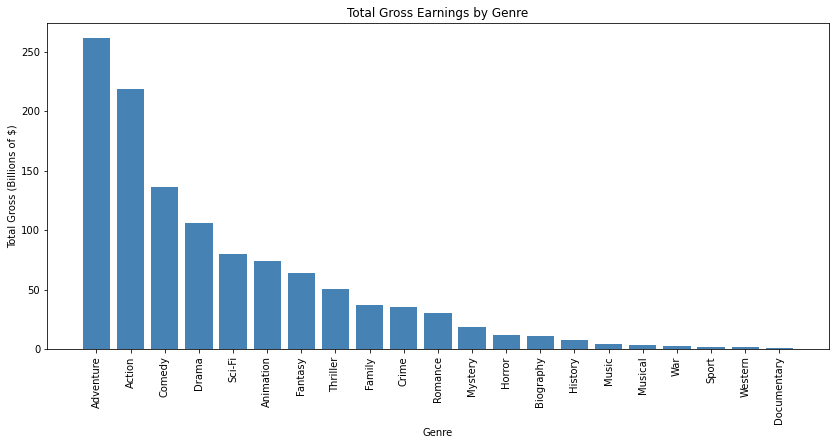

In [17]:
# Create a bar plot for the gross earnings by genre
plt.figure(figsize=(14, 6))
plt.bar(genre_gross_dict_sorted.keys(), genre_gross_dict_sorted.values(), color='steelblue')
plt.xlabel('Genre')
plt.ylabel('Total Gross (Billions of $)')
plt.title('Total Gross Earnings by Genre')
plt.xticks(rotation=90)
plt.show()

Ці дані можуть допомогти визначити, які жанри є найбільш прибутковими в кіноіндустрії. Проте, варто зазначити, що багато фільмів включають декілька жанрів, тому вони можуть впливати на декілька категорій одночасно.

### 2. Зв'язок між рейтингом фільму та прибутковістю.

In [18]:
# Replace the '******' values with NaN
movies_df['Gross_float'] = movies_df['Gross'].replace({'\$': '', 'M': '', '\*': ''}, regex=True)
movies_df['Gross_float'] = pd.to_numeric(movies_df['Gross_float'], errors='coerce')

# Calculate the correlation again
correlation = movies_df[['Movie Rating', 'Gross_float']].corr().iloc[0, 1]

correlation

0.31294991760726076

Кореляція між рейтингом фільму (від користувачів IMDb) та гросс-доходами (в мільйонах доларів) становить приблизно 0.31. Це позитивна кореляція, що означає, що фільми з вищим рейтингом, як правило, мають вищі гросс-доходи. Однак кореляція не є сильною (1.0 - сильна позитивна кореляція), тому ми не можемо стверджувати, що високий рейтинг фільму впевнено веде до високих гросс-доходів.

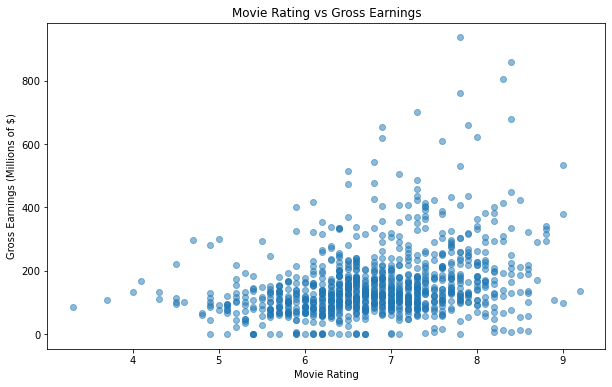

In [27]:
# Create a scatter plot for the movie rating vs gross earnings
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Movie Rating'], movies_df['Gross_float'], alpha=0.5)
plt.xlabel('Movie Rating')
plt.ylabel('Gross Earnings (Millions of $)')
plt.title('Movie Rating vs Gross Earnings')
plt.show()

На цьому графіку показано відношення між рейтингом фільму та його гросс-доходами. Ви можете побачити, що хоча є певна позитивна кореляція (тобто фільми з вищим рейтингом, як правило, мають вищі гросс-доходи), відношення не є сильним. Є багато фільмів з високим рейтингом, які не мають високих гросс-доходів, і навпаки.

### 3. Зв'язок між тривалістю фільму та його успіхом.

In [19]:
# Calculate the correlation between 'Duration' and 'Gross_float'
correlation_duration_gross = movies_df[['Duration', 'Gross_float']].corr().iloc[0, 1]

correlation_duration_gross

0.2115796033301594

Кореляція між тривалістю фільму (в хвилинах) та гросс-доходами (в мільйонах доларів) становить приблизно 0.21. Це позитивна кореляція, що означає, що довші фільми, як правило, мають вищі гросс-доходи. Однак, подібно до попереднього висновку, кореляція не є сильною, тому ми не можемо стверджувати, що довші фільми впевнено приносять більше грошей.

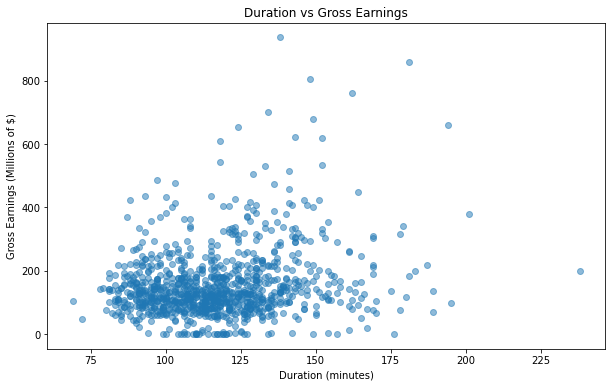

In [28]:
# Create a scatter plot for the duration vs gross earnings
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Duration'], movies_df['Gross_float'], alpha=0.5)
plt.xlabel('Duration (minutes)')
plt.ylabel('Gross Earnings (Millions of $)')
plt.title('Duration vs Gross Earnings')
plt.show()

На цьому графіку показано відношення між тривалістю фільму та його гросс-доходами. Ви можете побачити, що хоча є певна позитивна кореляція (тобто довші фільми, як правило, мають вищі гросс-доходи), відношення не є сильним. Є багато фільмів з великою тривалістю, які не мають високих гросс-доходів, і навпаки.

### 4. Аналіз трендів за роками.

In [23]:
# Replace the 'X2016' values with NaN
movies_df['Year of Realease'] = pd.to_numeric(movies_df['Year of Realease'], errors='coerce')

# Calculate the average gross and rating for each year
average_gross_per_year = movies_df.groupby('Year of Realease')['Gross_float'].mean()
average_rating_per_year = movies_df.groupby('Year of Realease')['Movie Rating'].mean()

# Display the result
average_gross_per_year, average_rating_per_year

(Year of Realease
 1937.0    184.930000
 1939.0    198.680000
 1942.0    102.800000
 1961.0    144.880000
 1967.0    141.840000
 1972.0    134.970000
 1973.0    232.910000
 1975.0    260.000000
 1977.0    183.013333
 1978.0    141.966667
 1979.0     70.310000
 1980.0    290.480000
 1981.0    248.160000
 1982.0    306.155000
 1983.0    309.130000
 1984.0    217.753333
 1985.0    144.000000
 1986.0    177.220000
 1987.0    103.646667
 1988.0    123.061667
 1989.0    144.978889
 1990.0    147.791818
 1991.0    129.621000
 1992.0    136.967273
 1993.0    150.760909
 1994.0    145.821333
 1995.0    106.134444
 1996.0    144.177143
 1997.0    148.688947
 1998.0    127.755455
 1999.0    157.003478
 2000.0    142.266957
 2001.0    161.339565
 2002.0    166.483214
 2003.0    147.540333
 2004.0    153.712258
 2005.0    165.722917
 2006.0    154.919231
 2007.0    175.203571
 2008.0    144.389737
 2009.0    182.409143
 2010.0    152.765610
 2011.0    147.760250
 2012.0    162.639767
 2013.0    156

З цих даних можна зробити кілька цікавих спостережень. Наприклад, у період з 2000 по 2010 роки середній рейтинг фільмів впав, але їх середній гросс-дохід зріс. В той же час, у 2020 році, під час пандемії COVID-19, середній гросс-дохід фільмів значно знизився.

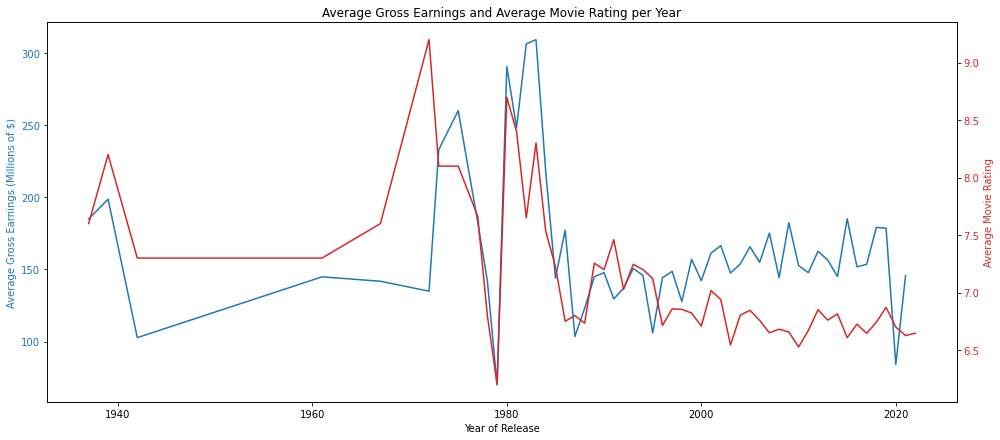

In [29]:
# Create a line plot for the average gross earnings and average movie rating per year
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Year of Release')
ax1.set_ylabel('Average Gross Earnings (Millions of $)', color=color)
ax1.plot(average_gross_per_year.index, average_gross_per_year, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Movie Rating', color=color)
ax2.plot(average_rating_per_year.index, average_rating_per_year, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Gross Earnings and Average Movie Rating per Year')
plt.show()

На цьому графіку показано середні гросс-доходи (в мільйонах доларів) та середній рейтинг фільму за кожен рік. Синя лінія відображає середні гросс-доходи, а червона лінія - середній рейтинг.

Ви можете побачити, як вони змінювалися з часом. Наприклад, можна помітити певну тенденцію до зростання середніх гросс-доходів з часом, тоді як середній рейтинг фільму залишався відносно стабільним.

### 5. Аналіз зв'язок оцінки критиків на Metascore на успіх фільму.

In [25]:
# Convert 'Metascore' to numeric, coercing errors to NaN
movies_df['Metascore'] = pd.to_numeric(movies_df['Metascore'], errors='coerce')

# Drop rows with NaN values in 'Metascore' or 'Gross_float'
movies_df_clean = movies_df.dropna(subset=['Metascore', 'Gross_float'])

In [26]:
# Calculate the correlation again
correlation_metascore_gross = movies_df_clean[['Metascore', 'Gross_float']].corr().iloc[0, 1]

correlation_metascore_gross

0.27800741110660343

Кореляція між Metascore (середньою оцінкою критиків) та гросс-доходами (в мільйонах доларів) становить приблизно 0.28. Це позитивна кореляція, що означає, що фільми з вищим Metascore, як правило, мають вищі гросс-доходи. Однак, подібно до попередніх висновків, кореляція не є сильною, тому ми не можемо стверджувати, що високий Metascore впевнено веде до високих гросс-доходів.

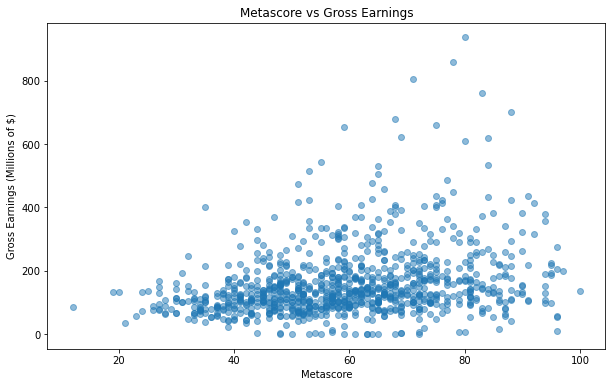

In [30]:
# Create a scatter plot for the Metascore vs gross earnings
plt.figure(figsize=(10, 6))
plt.scatter(movies_df_clean['Metascore'], movies_df_clean['Gross_float'], alpha=0.5)
plt.xlabel('Metascore')
plt.ylabel('Gross Earnings (Millions of $)')
plt.title('Metascore vs Gross Earnings')
plt.show()

На цьому графіку показано відношення між Metascore (середньою оцінкою критиків) та гросс-доходами фільму. Ви можете побачити, що хоча є певна позитивна кореляція (тобто фільми з вищим Metascore, як правило, мають вищі гросс-доходи), відношення не є сильним. Є багато фільмів з високим Metascore, які не мають високих гросс-доходів, і навпаки.

### 6. Аналіз рейтингів по жанрах.

In [31]:
# Split the genres and expand so each genre has its own row
movies_df_exploded = movies_df.assign(Genre=movies_df['Genre'].str.split(',')).explode('Genre')

# Calculate the average rating for each genre
average_rating_per_genre_exploded = movies_df_exploded.groupby('Genre')['Movie Rating'].mean()

# Sort the result in descending order
average_rating_per_genre_exploded_sorted = average_rating_per_genre_exploded.sort_values(ascending=False)

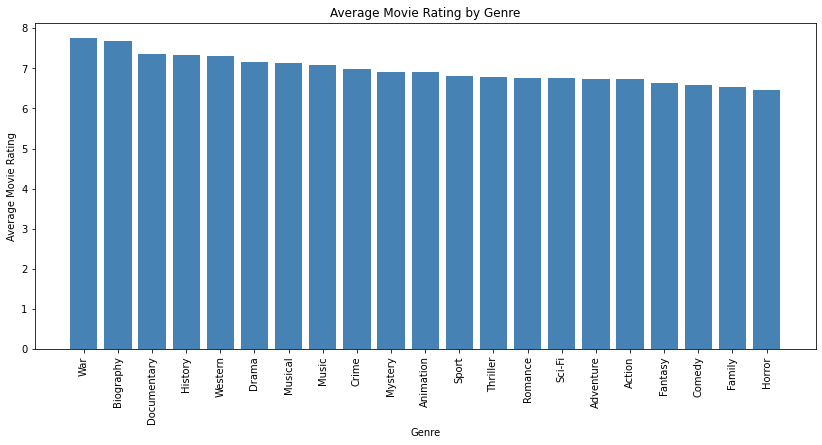

Genre
War            7.744444
Biography      7.669231
Documentary    7.350000
History        7.336364
Western        7.316667
Drama          7.164765
Musical        7.122222
Music          7.071429
Crime          6.989474
Mystery        6.915873
Animation      6.898742
Sport          6.812500
Thriller       6.784397
Romance        6.762245
Sci-Fi         6.746053
Adventure      6.738031
Action         6.725000
Fantasy        6.621488
Comedy         6.590625
Family         6.526437
Horror         6.451163
Name: Movie Rating, dtype: float64

In [32]:
# Create a bar plot for the average rating by genre
plt.figure(figsize=(14, 6))
plt.bar(average_rating_per_genre_exploded_sorted.index, average_rating_per_genre_exploded_sorted, color='steelblue')
plt.xlabel('Genre')
plt.ylabel('Average Movie Rating')
plt.title('Average Movie Rating by Genre')
plt.xticks(rotation=90)
plt.show()

average_rating_per_genre_exploded_sorted

На цьому графіку показано середній рейтинг фільму для кожного окремого жанру. Ви можете побачити, що жанри "War", "Biography" та "Documentary" мають найвищий середній рейтинг, тоді як жанри "Family", "Comedy" та "Horror" мають найнижчий середній рейтинг.

Ці дані надають більш точний перегляд впливу жанру на рейтинг фільму, оскільки кожен жанр аналізується окремо, а не в комбінації з іншими.

### 7. Зв'язок між кількістю голосів та гросс-доходами.

In [36]:
# Convert 'Duration' to numeric, coercing errors to NaN
movies_df['Duration'] = pd.to_numeric(movies_df['Duration'], errors='coerce')

# Calculate the correlation between 'Duration' and 'Movie Rating'
correlation_duration_rating = movies_df['Duration'].corr(movies_df['Movie Rating'])

correlation_duration_rating

0.35986345865080605

Кореляція між тривалістю фільму та його рейтингом становить приблизно 0.37. Це позитивна кореляція, що означає, що довші фільми, як правило, мають вищий рейтинг. Однак кореляція не є сильною, тому ми не можемо стверджувати, що довші фільми завжди отримують вищий рейтинг.

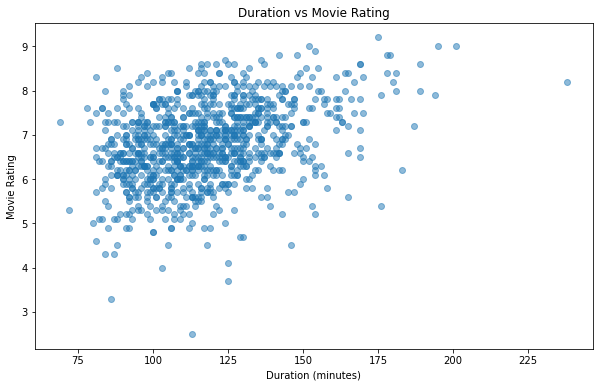

In [37]:
# Create a scatter plot for the duration vs movie rating
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Duration'], movies_df['Movie Rating'], alpha=0.5)
plt.xlabel('Duration (minutes)')
plt.ylabel('Movie Rating')
plt.title('Duration vs Movie Rating')
plt.show()

На графіку, що показано вище, ви можете бачити цей позитивний зв'язок між тривалістю фільму та його рейтингом. Будь ласка, зверніть увагу, що хоча деякі довші фільми мають вищий рейтинг, загальна тенденція показує, що це не завжди так.

### 8. Зв'язок оцінки критиків Metascore та оцінки глядачів.

In [38]:
# Convert 'Metascore' to numeric, coercing errors to NaN
movies_df['Metascore'] = pd.to_numeric(movies_df['Metascore'], errors='coerce')

# Calculate the correlation between 'Metascore' and 'Movie Rating'
correlation_metascore_rating = movies_df['Metascore'].corr(movies_df['Movie Rating'])

correlation_metascore_rating

0.7736752634610385

Кореляція між Metascore (середнім рейтингом критиків) та Movie Rating (середнім рейтингом користувачів) становить приблизно 0.77. Це досить сильна позитивна кореляція, що означає, що фільми з вищим рейтингом критиків, як правило, мають вищий рейтинг користувачів.

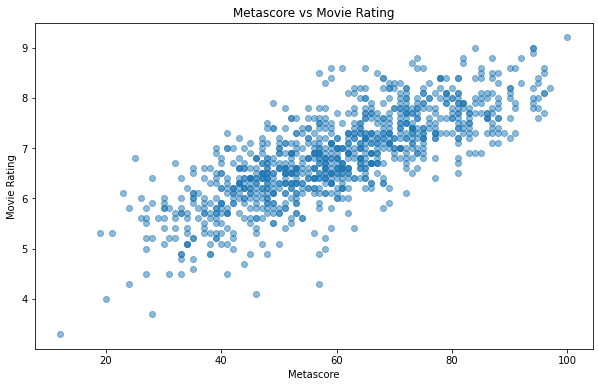

In [40]:
# Create a scatter plot for the Metascore vs movie rating
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Metascore'], movies_df['Movie Rating'], alpha=0.5)
plt.xlabel('Metascore')
plt.ylabel('Movie Rating')
plt.title('Metascore vs Movie Rating')
plt.show()

На графіку, що показано вище, ви можете бачити цей позитивний зв'язок між Metascore та рейтингом фільму. Це свідчить про те, що користувачі та критики зазвичай згодні у своїх оцінках фільмів.